# Analyze and Visualize Data

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

%matplotlib inline

In [8]:
df_master

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,dog_name,rating,dog_count,jpg_url,img_num,breed,confidence,favorite_count,retweet_count
0,889665388333682689,NaN,NaN,2017-07-25 01:55:32,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,NaN,13,1,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,1,Pembroke,0.966327,48283,10196
1,889531135344209921,NaN,NaN,2017-07-24 17:02:04,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,Stuart,13,1,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden_retriever,0.953442,15154,2262
2,878776093423087618,NaN,NaN,2017-06-25 00:45:22,"<a href=""http://twitter.com/download/iphone"" r...",This is Snoopy. He's a proud #PrideMonthPuppo....,https://twitter.com/dog_rates/status/878776093...,Snoopy,13,1,https://pbs.twimg.com/media/DDIKMXzW0AEibje.jpg,2,Italian_greyhound,0.734684,19470,4196
3,874012996292530176,NaN,NaN,2017-06-11 21:18:31,"<a href=""http://twitter.com/download/iphone"" r...",This is Sebastian. He can't see all the colors...,https://twitter.com/dog_rates/status/874012996...,Sebastian,13,1,https://pbs.twimg.com/media/DCEeLxjXsAAvNSM.jpg,2,Cardigan,0.806674,34939,10695
4,867421006826221569,NaN,NaN,2017-05-24 16:44:18,"<a href=""http://twitter.com/download/iphone"" r...",This is Shikha. She just watched you drop a sk...,https://twitter.com/dog_rates/status/867421006...,Shikha,12,1,https://pbs.twimg.com/media/DAmyy8FXYAIH8Ty.jpg,1,Eskimo_dog,0.616457,16473,2619
5,859607811541651456,NaN,NaN,2017-05-03 03:17:27,"<a href=""http://twitter.com/download/iphone"" r...",Sorry for the lack of posts today. I came home...,https://twitter.com/dog_rates/status/859607811...,NaN,13,1,https://pbs.twimg.com/media/C-3wvtxXcAUTuBE.jpg,1,golden_retriever,0.895529,19167,1663
6,855851453814013952,NaN,NaN,2017-04-22 18:31:02,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,NaN,13,1,https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg,1,flat-coated_retriever,0.321676,47144,18823
7,825535076884762624,NaN,NaN,2017-01-29 02:44:34,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very loving and accepting puppo. Appe...,https://twitter.com/dog_rates/status/825535076...,NaN,14,1,https://pbs.twimg.com/media/C3TjvitXAAAI-QH.jpg,1,Rottweiler,0.681495,56415,19289
8,825026590719483904,NaN,NaN,2017-01-27 17:04:02,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Pablo. He's one gorgeous puppo. A...,https://www.gofundme.com/my-puppys-double-cata...,Pablo,12,1,https://pbs.twimg.com/media/C3MVTeHWcAAGNfx.jpg,2,Eskimo_dog,0.524454,6899,1445
9,822872901745569793,NaN,NaN,2017-01-21 18:26:02,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,NaN,13,1,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,Lakeland_terrier,0.196015,143995,49429


In [2]:
matplotlib.style.use('ggplot')

In [3]:
# Import the clean dataset into dataframe
df_master = pd.read_csv('twitter_archive_master.csv')
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 16 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
dog_name                 1369 non-null object
rating                   1993 non-null float64
dog_count                1994 non-null float64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
breed                    1994 non-null object
confidence               1994 non-null float64
favorite_count           1994 non-null float64
retweet_count            1994 non-null float64
dtypes: float64(8), int64(1), object(7)
memory usage: 264.8+ KB


# Scatter Matrix

/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=4196983835.0, right=4196983835.0
  'left=%s, right=%s') % (left, right))
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:3045: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=4196983835.0, top=4196983835.0
  'bottom=%s, top=%s') % (bottom, top))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f151e7d13c8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f1517a654e0>]], dtype=object)

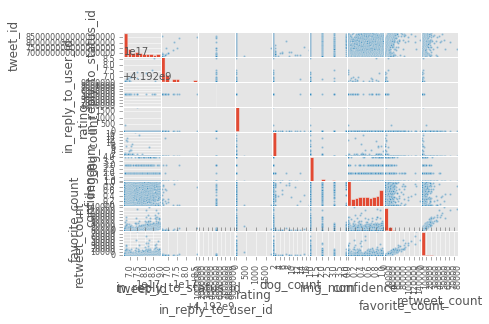

In [6]:
pd.scatter_matrix(df_master)

# Analysing tweet_count and retweet_count

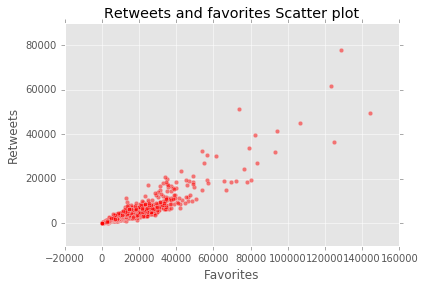

In [10]:
df_master.plot(kind = 'scatter', x = 'favorite_count', y = 'retweet_count', alpha = 0.5, color = 'red')
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot')

The plot shows that when favorites are high, retweets are also high. They share a strong positive correlation.

In [25]:
# Converting timestampt to datetime format
df_master.timestamp = pd.to_datetime(df_master['timestamp'])

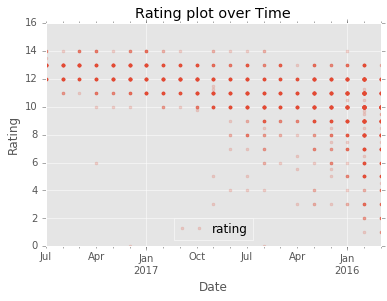

In [26]:
# Our range will be [0,16] taking of the two ouliers (1776 and 420)
df_master.plot(x = df_master.timestamp.dt.to_period('M'), y ='rating', ylim=[0,16], style = '.', alpha = .2)
plt.title('Rating plot over Time')
plt.xlabel('Date')
plt.ylabel('Rating')

In [28]:
df_master[df_master['rating'] <= 14]['rating'].describe()

count    1991.000000
mean       10.544674
std         2.182670
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: rating, dtype: float64

- More than 75% of the data has more than 12/10 as rating

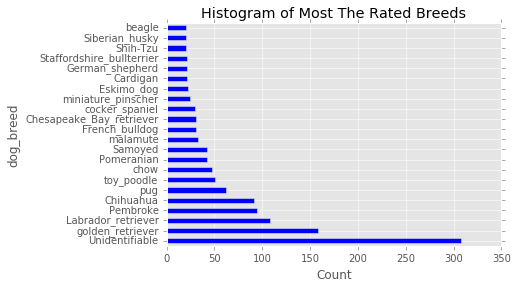

In [30]:
df_by_breed = df_master.groupby('breed').filter(lambda x: len(x) >= 20)

df_by_breed['breed'].value_counts().plot(kind = 'barh')
plt.title('Histogram of Most The Rated Breeds')
plt.xlabel('Count')
plt.ylabel('dog_breed')

Top breed is golder retriever

# Conclusion
WeRateDogs is a quirky twitter handle dedicated to dog lovers. The rating system I have never seen before andvery catchy. Most of the ratings is greater than 12/10. The most popular dg breed on the group is golden retriever. In general, from our sample, retrievers are quite popular amongst the members of the group. 